<a href="https://colab.research.google.com/github/SantosCristiano/artificial-intelligence-python/blob/main/rede_neural_python_puro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede neural usando python puro

### importa o numpy

In [1]:
import numpy as np

## Grafo

In [2]:
class Graph():
  def __init__(self):
    self.operations = []
    self.placeholders = []
    self.variables = []

  def set_as_default(self):
    global _default_graph
    _default_graph = self

## Operações




In [4]:
class Operation():
  #construtor
  def __init__(self, input_nodes = []):
    self.input_nodes = input_nodes
    # a lista vazia vai ser substituída
    # pela classe que irá extender Operation
    # ou seja as operações
    self.output_nodes = []

    # para cada nó no input_nodes
    # ponha essa operação na lista
    # output_nodes daquele nó
    for node in input_nodes:
      node.output_nodes.append(self)
    # As operações se inserem(self) na lista
    # de operações do grafo global da rede
    _default_graph.operations.append(self)
  # O pass é porque o compute é apenas um método de espaço
  # reservado e será substituído pelo método específico (soma, multiplica...)
  def compute(self):
    pass # deixa a implementação real para as subclasses

### Variável

In [5]:
class Variable():
  def __init__(self, initial_value= None):
    self.value = initial_value
    self.output_nodes = []

    _default_graph.variables.append(self)

## Criando operações que extendem <strong>Operation</strong>

## Operações

## obs. as classes <strong>add</strong>, <strong>multiply</strong> e <strong>matmul</strong> estão começando em letra <strong>minúscula</strong>, para seguir a convenção de nomenclatura do tensorflow.

In [6]:
class add(Operation):
  def __init__(self, x, y):
    # Construimos a parte da classe pai
    # o Operation e passamos a lista de
    # entrada [x, y]
    super().__init__([x, y])

  # Esse método compute sobrescreve o compute da classe Operation
  def compute(self, x_var, y_var):
    self.inputs = [x_var, y_var]
    return x_var + y_var

In [7]:
class multiply(Operation):
  def __init__(self, x, y):
    # Construimos a parte da classe pai
    # o Operation e passamos a lista de
    # entrada [x, y]
    super().__init__([x, y])

  # Esse método compute sobrescreve o compute da classe Operation
  def compute(self, x_var, y_var):
    self.inputs = [x_var, y_var]
    return x_var * y_var

In [9]:
# Imagine que x_var e y_var sejam matrizes numpy
class matmul(Operation):
  def __init__(self, x, y):
    # Construimos a parte da classe pai
    # o Operation e passamos a lista de
    # entrada [x, y]
    super().__init__([x, y])
  # Esse método compute sobrescreve o compute da classe Operation
  def compute(self, x_var, y_var):
    self.inputs = [x_var, y_var]
    return x_var * y_var

## Placeholder, variáveis e o Grafo da rede

### Placeholder

In [10]:
class Placeholder():
  def __init__(self):
    self.output_nodes = []
    _default_graph.placeholders.append(self)

## Instanciando e inicializando um grafo global

### Exemplo de uso
z = Ax + b

A = 10

b = 1

z = 10x + 1

## Garantindo a ordem de execução correta das computações

## Algoritmo Postorder(tree)

1.  Atravessa a subárvore esquerda, ou seja, chama a Postorder(left-subtree)
2.   Atravessa a subárvore direita, ou seja, chama a Postorder(right-subtree)
2.   Visita o nó



In [11]:
def traverse_postorder(operation):
  """
     https://en.wikipedia.org/wiki/Tree_traversal#Post-order_(LRN)
     Percorre os nós na ordem correta, executando portanto a
     computação na ordem correta, primeiro Ax depois Ax + b.
  """

  nodes_postorder = []
  def recurse(node): # cada node = (node + op)
    # verifica se o nó é uma instância de Operation
    if isinstance(node, Operation):
      # se entrou, é porque no nó é uma operação
      # percorre a lista input_nodes do nó da classe Operation
      for input_node in node.input_nodes:
        # Chama recursivamente a recurse() passando cada elemento
        # da lista input_nodes do nó da classe Operation
        recurse(input_node)
    # quando sai do if faz o append na lista nodes_postorder,
    # de um dicionário onde o nome do nó é a chave
    # e o valor é o próprio nó
    nodes_postorder.append(node)
  # chamada da função recurse() passando a operação
  recurse(operation)
  return nodes_postorder

## Executa o grafo

In [ ]:
#Executa o gráfico com a classe Session
class Session():
  # O termo feed_dict é pra manter a mesma terminologia do tensorflow
  def run(self, operation, feed_dict={}):
    # Recebe a ordem da execução
    nodes_postorder = traverse_postorder(operation)
    for node in nodes_postorder:
      # Se o nó for um Placeholder
      if type(node) == Placeholder:
        node.output = feed_dict[node]
      # Se o nó for um Variable
      elif type(node) == Variable:
        # Insere na lista output do nó da variável o value do nó da vez
        node.output = node.value
      else:
        node.inputs = [input_node.output for input_node in node.input_nodes]
        # * infere que o número de parâmetros é determinado
        # pelo tamanho da lista
        node.output = node.compute(*node.inputs)
      # Converte a lista para um numpy array
      if type(node.output) == list:
        # Para matmul funcionar
        node.output = np.array(node.output)
    return operation.output

## Instancia o Grafo e define como global

In [ ]:
g = Graph()
g.set_as_default()

Criando as duas variáveis

In [ ]:
A = Variable(10)
b = Variable(1)

### Criando um Placeholder e atribuindo a x

In [ ]:
x = Placeholder()

### Multiplicação da A por x atribuindo a y

In [ ]:
y = multiply(A, x)

### Adição de y e b

In [ ]:
z = add(y, b)

### Criando uma Session

In [ ]:
sess = Session()

## Usa a sessão para efetivamente fazer a computação

### z = 10x + 1, se definimos <strong>x</strong> como <strong>10</strong> então:
### z = 10 * 10 + 1 = 101

In [ ]:
result = sess.run(operation = z, feed_dict={x: 10})
print(result)

101


### Multiplicação de matriz

In [ ]:
g = Graph()
g.set_as_default()
A = Variable([[10, 20],[30, 40]])
b = Variable([1, 1])

In [ ]:
x = Placeholder()
y = matmul(A, x)
z = add(y, b)
result = sess.run(operation = z, feed_dict={x: 10})
print(result)

[[101 201]
 [301 401]]


# Classificação

## Função de ativação

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)

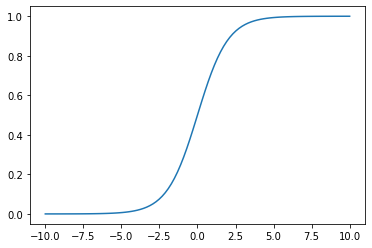

In [ ]:
plt.plot(sample_z, sample_a)

# Classe Sigmoid


Vamos fazer isso em uma operação, porque tecnicamente uma ativação é uma operação.

In [ ]:
class Sigmoid(Operation):

  def __init__(self, z):
    super().__init__([z])

  def compute(self, z_value):
    return 1 / (1 + np.exp(-z_value))

## Gerando os dados para a classificação com <strong>sklearn</strong>

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
data = make_blobs(n_samples = 50, n_features = 2, centers = 2, random_state = 75, shuffle = False)

In [ ]:
data

(array([[  1.85582689,  -6.74473432],
        [  1.82921897,  -9.86956281],
        [  1.99243535,  -8.85885722],
        [  2.72532584,  -7.51956557],
        [  1.57961049,  -8.17089971],
        [  0.61463602,  -9.51908883],
        [  1.96322881,  -9.50169117],
        [  0.65582768,  -9.5920878 ],
        [  2.09335725,  -7.66278316],
        [  2.00890845,  -9.78471782],
        [  1.92000795,  -7.50953708],
        [  1.06965742,  -8.1648251 ],
        [  1.23053506,  -7.98873571],
        [  0.06441546,  -9.04982817],
        [  1.3970852 ,  -7.25918415],
        [  2.88603902,  -8.85261704],
        [  0.79580385,  -9.00301023],
        [  3.04605603,  -7.50486114],
        [  3.13114921,  -8.6849493 ],
        [  1.41804346,  -8.10517372],
        [  1.31977821,  -7.2710667 ],
        [  1.90073973,  -7.24386675],
        [ -0.07326715, -11.69999644],
        [ -1.20046211,  -9.55928542],
        [  1.05865542,  -8.43841416],
        [  7.38443759,   7.72520389],
        [  8

In [ ]:
type(data)

tuple

In [ ]:
data[0]

array([[  1.85582689,  -6.74473432],
       [  1.82921897,  -9.86956281],
       [  1.99243535,  -8.85885722],
       [  2.72532584,  -7.51956557],
       [  1.57961049,  -8.17089971],
       [  0.61463602,  -9.51908883],
       [  1.96322881,  -9.50169117],
       [  0.65582768,  -9.5920878 ],
       [  2.09335725,  -7.66278316],
       [  2.00890845,  -9.78471782],
       [  1.92000795,  -7.50953708],
       [  1.06965742,  -8.1648251 ],
       [  1.23053506,  -7.98873571],
       [  0.06441546,  -9.04982817],
       [  1.3970852 ,  -7.25918415],
       [  2.88603902,  -8.85261704],
       [  0.79580385,  -9.00301023],
       [  3.04605603,  -7.50486114],
       [  3.13114921,  -8.6849493 ],
       [  1.41804346,  -8.10517372],
       [  1.31977821,  -7.2710667 ],
       [  1.90073973,  -7.24386675],
       [ -0.07326715, -11.69999644],
       [ -1.20046211,  -9.55928542],
       [  1.05865542,  -8.43841416],
       [  7.38443759,   7.72520389],
       [  8.15467319,   7.87489634],
 

In [ ]:
data[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

## Separando features e labels

In [ ]:
features = data[0]
labels = data[1]

## Plotando

Estamos pegando todas as linhas só quem é da coluna 0 (zero) com features[:, 0] e todas as linhas só quem é da coluna 1 com features[:,1]

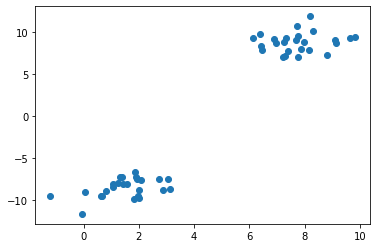

In [ ]:
plt.scatter(features[:, 0], features[:,1])

Vamos colocar uma cor para diferenciar

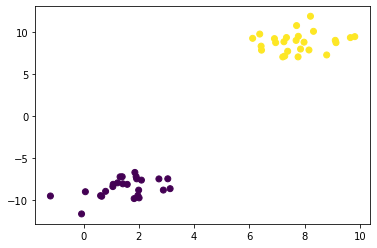

In [ ]:
plt.scatter(features[:, 0], features[:,1], c = labels)

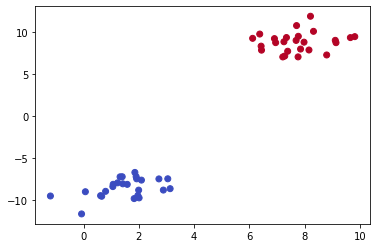

In [ ]:
plt.scatter(features[:, 0], features[:,1], c = labels, cmap = 'coolwarm')

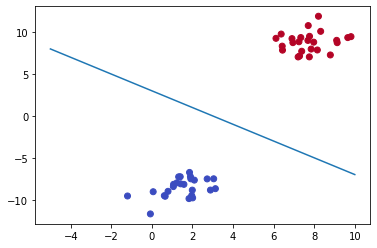

In [ ]:
x = np.linspace(-5, 10, 10)
y = - x + 3
plt.scatter(features[:, 0], features[:,1], c = labels, cmap = 'coolwarm')
plt.plot(x, y)

Valores abaixo de zero represeta a parte do espaço relativo a cor azul e valores acima de zero a cor vermelha.

## Equação da linha separadora: (1, 1) * f - 3 = 0

Equação do classificador

y = -x + 3

f1 = -f0 + 3

f1 + f0 - 3 = 0

(1,1) * F - 3 = 0

(1,1) é o Peso e 3 é um viés

Por exemplo, considere o ponto (8.0, 8.0)



In [ ]:
res = np.array([1,1]).dot(np.array([[8.0],[8.0]])) - 3
print(res)
print(sigmoid(res))

[13.]
[0.99999774]


13 > 0, o que implica que ele pertence a classe vermelha

In [ ]:
res2 = np.array([1, 1]).dot(np.array([[1], [-11.0]])) - 3
print(res2)
print(sigmoid(res2))

[-13.]
[2.2603243e-06]


13 < 0, o que implica que ele pertence a classe azul

# Grafo

In [ ]:
g = Graph()

In [ ]:
g.set_as_default()

In [ ]:
x = Placeholder()

In [ ]:
w = Variable([1, 1])

In [ ]:
b = Variable(-3)

In [ ]:
z = add(matmul(w, x), b)

In [ ]:
a = Sigmoid(z)

In [ ]:
sess = Session()

In [ ]:
sess.run(operation = a, feed_dict = {x: [8.0, 8.0]})

array([0.99330715, 0.99330715])

O resultado são números bem próximos de 1

In [ ]:
sess.run(operation = a, feed_dict = {x: [1.0, -11.0]})

array([1.19202922e-01, 8.31528028e-07])

Os resultados são números bem próximos de zero, o 1.19202922e-01 e 8.31528028e-07 são números em notação científica, eles são bem próximos de zero.
